In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"

In [3]:
adata = sc.read('../../Data/adata_scRNA_Annotated.h5ad')

In [4]:
adata.obs.loc[adata.obs['BigCellType']=='Protonephridia', 'BigCellType'] = 'Gut'

In [5]:
Celltype_list = ['Epidermal', 'Gut', 'Muscle', 'Neoblast', 'Neuronal', 'Parenchymal',  'Secretory']
Celltype_colors = ['#aa40fc', '#279e68', '#d62728', '#A9A9A9', '#ff7f0e', '#e377c2',  '#1f77b4']

color_dict = dict(zip(Celltype_list, Celltype_colors))

In [6]:
int_time = [0, 0.25, 0.5, 1, 2, 3, 5, 7]
int_time = [1, 2, 3, 4, 5, 6, 7, 8]
#int_time = np.log10(int_time)
#int_time[0] = 0
Time_dict = dict(zip(['cut0d', 'cut6h', 'cut12h', 'cut24h', 'cut2d', 'cut3d', 'cut5d', 'cut7d'], int_time))

In [7]:
# Downsampling
sub_adata_list = {}
for it in range(5):
    sub_cells = np.random.choice(list(adata.obs_names), int(adata.shape[0]*0.2), replace=False)
    sub_adata_list[it] = adata[sub_cells]

In [8]:
Total_cells_list = {}
for it in range(5):
    Total_cells_list[it] = pd.value_counts(sub_adata_list[it].obs['TimePoint'])

In [9]:
plot_df = {}
for temp_label in Celltype_list:
    plot_df[temp_label] = pd.DataFrame(columns=['Proportion', 'TimePoint', 'sub_Batch'])
    for it in range(5):
        ad = sub_adata_list[it].copy()
        ad = ad[ad.obs['BigCellType']==temp_label]
        for time_it in ['cut0d', 'cut6h', 'cut12h', 'cut24h', 'cut2d', 'cut3d', 'cut5d', 'cut7d']:
            temp_ad = ad[ad.obs.loc[ad.obs['TimePoint']==time_it,].index,]
            plot_df[temp_label].loc[plot_df[temp_label].shape[0], :] = [temp_ad.shape[0]/Total_cells_list[it][time_it],Time_dict[time_it], it]

In [10]:
temp_df = pd.DataFrame()
for temp_label in Celltype_list:
    plot_df[temp_label]['CellType'] = temp_label
    temp_df = pd.concat([temp_df,plot_df[temp_label]])

C:\Users\DKNQIFEI\AppData\Local\Temp/ipykernel_12500/4233354101.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_xticklabels(['0', '0 hpa', '6 hpa', '12 hpa', '1 dpa', '2 dpa', '3 dpa', '5 dpa', '7 dpa'])


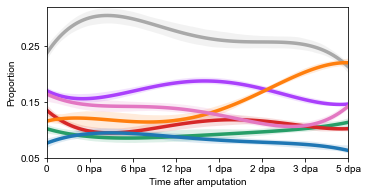

In [11]:
temp_df['Proportion'] = temp_df['Proportion'].map(float)
temp_df['TimePoint'] = temp_df['TimePoint'].map(float)
g = sns.lmplot(x="TimePoint", y="Proportion", hue='CellType',data=temp_df, order=4, palette=color_dict, line_kws={"lw": 3.5},scatter=False,
                height=2.8, aspect=1.8,legend=False, x_ci='sd')
plt.xlim([1, 8])
g.ax.set_xticklabels(['0', '0 hpa', '6 hpa', '12 hpa', '1 dpa', '2 dpa', '3 dpa', '5 dpa', '7 dpa'])
plt.xlabel('Time after amputation')
sns.despine(right=False, top=False)
plt.ylim([0.05, 0.32])
plt.yticks([0.05, 0.15, 0.25])

plt.savefig('scRNA_Proportion.png', bbox_inches='tight')